# ***DS5220 Project***
---

### ***Import Data***

In [ ]:
### Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Drive Mount 
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
### Import Child Recode
import pandas as pd
Children_location = "/content/drive/MyDrive/DS5220_Project/Dataset/Children Recode/ETKR71FL.DTA"
children_df = pd.read_stata(Children_location, convert_categoricals=False)
# Target
weight_age_sd = 'hw8'
height_age_sd = 'hw5'
weight_height_sd = 'hw11'
#new WHO values
weight_age_sd_new = 'hw71'
height_age_sd_new = 'hw70'
weight_height_sd_new = 'hw72'
# create stunting column
children_df['stunting'] = children_df[height_age_sd_new] < -100
# create wasting column
children_df['wasting'] = children_df[weight_height_sd_new] < -100
# create underweight column
children_df['underweight'] = children_df[weight_age_sd_new] < -100
#Divide by 10 to remove implied decimal place
children_df['hw3'] = children_df['hw3'] / 10
children_df['hw2'] = children_df['hw2'] / 10
children_df.head()
# Implement Target
children_df['target'] = (children_df['hw70'] < -100) & (children_df['hw71'] < -100) & (children_df['hw72'] < -100)
children_df = pd.DataFrame(children_df) 
children_df.rename(columns={"caseid":"case_id"}, inplace=True)
### children data 
children_df = pd.DataFrame({
    "case_id":children_df["case_id"],
    "Target":children_df["target"]
})
children_df.head()
print("Target num: ", children_df[children_df["Target"]==True].count())

Target num:  case_id    1763
Target     1763
dtype: int64


<ipython-input-2-db5cfc4b37c0>:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  children_df['stunting'] = children_df[height_age_sd_new] < -100
<ipython-input-2-db5cfc4b37c0>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  children_df['wasting'] = children_df[weight_height_sd_new] < -100
<ipython-input-2-db5cfc4b37c0>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1)

In [ ]:
### Import individual
Individual_location = "/content/drive/MyDrive/DS5220_Project/Dataset/Individual Recode/ETIR71FL.DTA"
individual_df = pd.read_stata(Individual_location, convert_categoricals=False)
individual_df = pd.DataFrame(individual_df) 
individual_df.head() 
# Feature Extratction 
individual_df = individual_df[["caseid","v012","v013","v020","v025","v042","v044","v046","v101","v106",
                               "v119","v121","v130","v133","v151","v169a","v171a","v191a","v203","v218"]]
# Column Rename
individual_df = pd.DataFrame({
    'case_id': individual_df['caseid'],
    'age': individual_df['v012'],
    'Age in 5-year groups': individual_df['v013'],
    'Rular/City': individual_df['v025'],
    'Ever-married sample': individual_df['v020'] ,
    'Household selected for hemoglobin': individual_df['v042'],
    'Selected for Domestic Violence module': individual_df['v044'],
    'Translator used': individual_df['v046'],
    'Region': individual_df['v101'],
    'Highest educational level': individual_df['v106'],
    'Household has: electricity': individual_df['v119'],
    'Household has: television': individual_df['v121'],
    'Religion': individual_df['v130'],
    'Education in single years': individual_df['v133'],
    'Sex of household head': individual_df['v151'],
    'Owns a mobile telephone': individual_df['v169a'],
    'Use of internet': individual_df['v171a'],
    'Wealth index factor score for urban/rural': individual_df['v191a'],
    'Daughters at home': individual_df['v203'],
    'Number of living children': individual_df['v218'],
})
individual_df.head()

### Data Join(Individual & Children Recode) 
df = pd.merge(individual_df, children_df, how="inner", on=("case_id"))
df.info()
# Data Split X, y
y = df[["Target"]]
X = df.drop(["Target"], axis=1) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10641 entries, 0 to 10640
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   case_id                                    10641 non-null  object
 1   age                                        10641 non-null  int8  
 2   Age in 5-year groups                       10641 non-null  int8  
 3   Rular/City                                 10641 non-null  int8  
 4   Ever-married sample                        10641 non-null  int8  
 5   Household selected for hemoglobin          10641 non-null  int8  
 6   Selected for Domestic Violence module      10641 non-null  int8  
 7   Translator used                            10641 non-null  int8  
 8   Region                                     10641 non-null  int8  
 9   Highest educational level                  10641 non-null  int8  
 10  Household has: electricity        

In [ ]:
### Data EDA
# One-hot encoding // v026, v044, v101, v119(7->0), v120(7->0), v130, v171a
temp_data = X
y.replace({"True":1, "False":0}, inplace=True)
X.replace({"Household has: electricity":7}, 0, inplace=True)
X.replace({"Household has: television":7}, 0, inplace=True)
X["Rular/City"].replace({1:"Urban", 2:"Rural"}, inplace=True)
X["Region"].replace({1:"Tigray", 2:"Afar", 3:"Amhara",4:"Oromia",5:"Somali",6:"Benishangul",
                       7:"SNNPR",8:"Gambela",9:"Harari",10:"Addis Adaba",11:"Dire Dawa"}, inplace=True)
X["Religion"].replace({1:"Orthodox",2:"Catholic",3:"Protestant",4:"Muslin",5:"Traditional",96:"Other"}, inplace=True)
X["Use of internet"].replace({0:"Never",1:"Yes, last 12 months",2:"Yes, before last 12 months",3:"Yes, can't establish when"}, inplace=True)
temp_X = X[["Rular/City","Region","Religion","Use of internet"]]
X_dum = pd.get_dummies(temp_X)
X.drop(["Rular/City","Region","Religion","Use of internet"], axis=1, inplace=True)
X.drop(["case_id"], axis=1, inplace=True)
X = pd.concat([X, X_dum], axis=1)
# Resample
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=22)
X, y = sm.fit_resample(X, y)
X.head()

<ipython-input-21-e9415ea278c5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.replace({"True":1, "False":0}, inplace=True)


,age,Age in 5-year groups,Ever-married sample,Household selected for hemoglobin,Selected for Domestic Violence module,Translator used,Highest educational level,Household has: electricity,Household has: television,Education in single years,...,Region_Tigray,Religion_Catholic,Religion_Muslin,Religion_Orthodox,Religion_Other,Religion_Protestant,Religion_Traditional,Use of internet_Never,"Use of internet_Yes, before last 12 months","Use of internet_Yes, last 12 months"
0,38,5,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,38,5,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,38,5,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,42,6,0,1,0,0,1,0,0,3,...,0,0,1,0,0,0,0,1,0,0
4,46,7,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


### ***RandomForest***

In [ ]:
### Modeling
### RandomForest 
# from sklearn import model_selection
from sklearn import model_selection
from imblearn.over_sampling import RandomOverSampler
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify = y, random_state = 22)
print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')
# RF
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators=20, max_features=40, random_state=22)
classifier_RF.fit(X_train, y_train)
y_pred = classifier_RF.predict(X_test)

training data has 14204 observation with 37 features
test data has 3552 observation with 37 features


<ipython-input-10-ffab9ec74d3c>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier_RF.fit(X_train, y_train)


Precision Score:  0.886404833836858
Recall Score:  0.8260135135135135
              precision    recall  f1-score   support

       False       0.84      0.89      0.86      1776
        True       0.89      0.83      0.86      1776

    accuracy                           0.86      3552
   macro avg       0.86      0.86      0.86      3552
weighted avg       0.86      0.86      0.86      3552



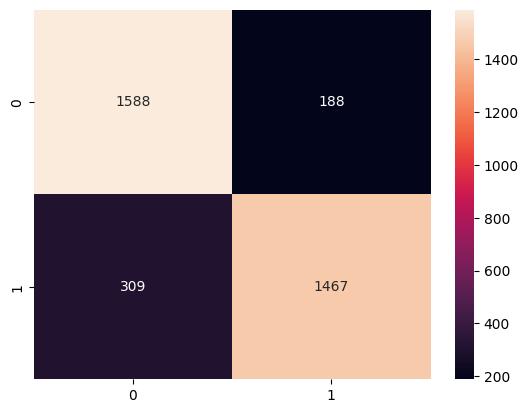

In [ ]:
### RF Confusion Matrix 
"""
The reason that the score of precision and recall is so low, 
beacause of the lack of absolute undernutrition data(True). 
For our next step of improvements, we have to solve the lack of True data 
"""
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
print("Precision Score: ", precision_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

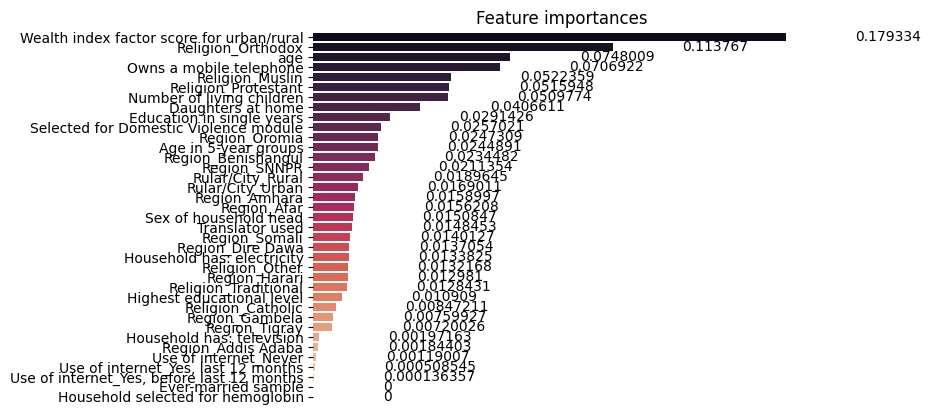

In [ ]:
### RF Feature Importance 
# Organizing feature names and importances in a DataFrame
features_df = pd.DataFrame({'features': classifier_RF.feature_names_in_, 'importances': classifier_RF.feature_importances_ })
# Sorting data from highest to lowest
features_df_sorted = features_df.sort_values(by='importances', ascending=False)
# Barplot of the result without borders and axis lines
Feature_importance = sns.barplot(data=features_df_sorted, x='importances', y ='features', palette="rocket")
sns.despine(bottom = True, left = True)
Feature_importance.set_title('Feature importances')
Feature_importance.set(xlabel=None)
Feature_importance.set(ylabel=None)
Feature_importance.set(xticks=[])
for value in Feature_importance.containers:
    Feature_importance.bar_label(value, padding=50)

### ***Naive Bayes*** 

In [ ]:
### Fitting 
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
y_pred = nb_clf.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precision Score:  0.6327907899960302
Recall Score:  0.8975225225225225
              precision    recall  f1-score   support

       False       0.82      0.48      0.61      1776
        True       0.63      0.90      0.74      1776

    accuracy                           0.69      3552
   macro avg       0.73      0.69      0.67      3552
weighted avg       0.73      0.69      0.67      3552



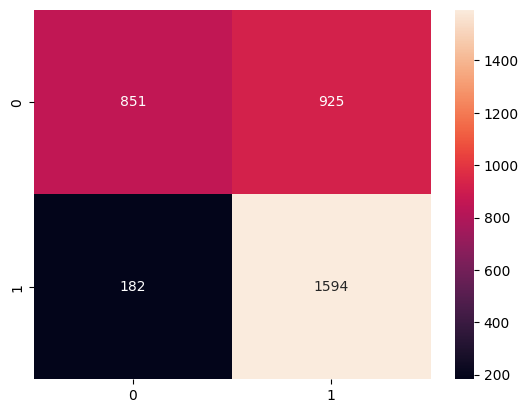

In [ ]:
### Naive Bayes Confusion Matrix 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
print("Precision Score: ", precision_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

### ***SVM***

In [ ]:
### SVM 
# Standardization (For SVM and MLP)
from sklearn.preprocessing import StandardScaler
X_scaler = X
scaler = StandardScaler() 
X_scaler = scaler.fit_transform(X)
column =['age', 'Age in 5-year groups', 'Ever-married sample',
       'Household selected for hemoglobin',
       'Selected for Domestic Violence module', 'Translator used',
       'Highest educational level', 'Household has: electricity',
       'Household has: television', 'Education in single years',
       'Sex of household head', 'Owns a mobile telephone',
       'Wealth index factor score for urban/rural', 'Daughters at home',
       'Number of living children', 'Rular/City_Rural', 'Rular/City_Urban',
       'Region_Addis Adaba', 'Region_Afar', 'Region_Amhara',
       'Region_Benishangul', 'Region_Dire Dawa', 'Region_Gambela',
       'Region_Harari', 'Region_Oromia', 'Region_SNNPR', 'Region_Somali',
       'Region_Tigray', 'Religion_Catholic', 'Religion_Muslin',
       'Religion_Orthodox', 'Religion_Other', 'Religion_Protestant',
       'Religion_Traditional', 'Use of internet_Never',
       'Use of internet_Yes, before last 12 months',
       'Use of internet_Yes, last 12 months']
X = pd.DataFrame(X_scaler, columns=column) 
X.head()

,age,Age in 5-year groups,Ever-married sample,Household selected for hemoglobin,Selected for Domestic Violence module,Translator used,Highest educational level,Household has: electricity,Household has: television,Education in single years,...,Region_Tigray,Religion_Catholic,Religion_Muslin,Religion_Orthodox,Religion_Other,Religion_Protestant,Religion_Traditional,Use of internet_Never,"Use of internet_Yes, before last 12 months","Use of internet_Yes, last 12 months"
0,1.453822,1.284625,0.0,0.0,-0.728142,-0.683074,-0.530414,-0.419397,-0.315237,-0.552509,...,-0.264988,-0.063808,1.121298,-0.528616,-0.067275,-0.359585,-0.079314,0.158287,-0.043801,-0.125425
1,1.453822,1.284625,0.0,0.0,-0.728142,-0.683074,-0.530414,-0.419397,-0.315237,-0.552509,...,-0.264988,-0.063808,1.121298,-0.528616,-0.067275,-0.359585,-0.079314,0.158287,-0.043801,-0.125425
2,1.453822,1.284625,0.0,0.0,-0.728142,-0.683074,-0.530414,-0.419397,-0.315237,-0.552509,...,-0.264988,-0.063808,1.121298,-0.528616,-0.067275,-0.359585,-0.079314,0.158287,-0.043801,-0.125425
3,2.111207,2.083064,0.0,0.0,-0.728142,-0.683074,0.938170,-0.419397,-0.315237,0.318825,...,-0.264988,-0.063808,1.121298,-0.528616,-0.067275,-0.359585,-0.079314,0.158287,-0.043801,-0.125425
4,2.768593,2.881503,0.0,0.0,-0.728142,-0.683074,-0.530414,-0.419397,-0.315237,-0.552509,...,-0.264988,-0.063808,1.121298,-0.528616,-0.067275,-0.359585,-0.079314,0.158287,-0.043801,-0.125425


In [ ]:
### SVM
# Data Split
from sklearn import svm
from sklearn.svm import SVC 
from sklearn import model_selection
from imblearn.over_sampling import RandomOverSampler
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify = y, random_state = 22)
print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 14204 observation with 37 features
test data has 3552 observation with 37 features


In [ ]:
# Predict 
cf_svm = svm.SVC(kernel="poly", C=0.1).fit(X_train, y_train)
cf_svm.fit(X_train, y_train) 
y_pred = cf_svm.predict(X_test) 

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precision Score:  0.9434546862896979
Recall Score:  0.6858108108108109
              precision    recall  f1-score   support

       False       0.75      0.96      0.84      1776
        True       0.94      0.69      0.79      1776

    accuracy                           0.82      3552
   macro avg       0.85      0.82      0.82      3552
weighted avg       0.85      0.82      0.82      3552



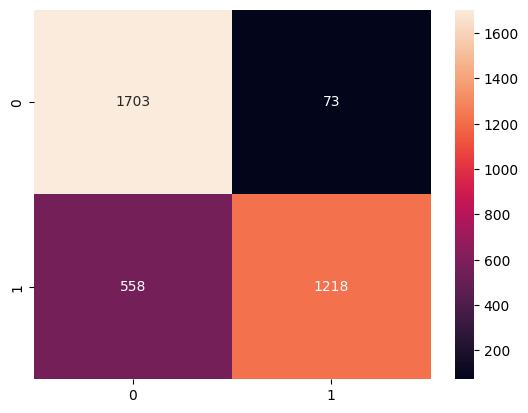

In [ ]:
### SVM Confusion Matrix 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
print("Precision Score: ", precision_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

### ***MLP***

training data has 14204 observation with 37 features
test data has 3552 observation with 37 features
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 37)                0         
                                                                 
 dense (Dense)               (None, 100)               3800      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 8,901
Trainable params: 8,901
Non-trainable params: 0
_________________________________________________________________


Epoch 1/30
426/444 [===========================>..] - ETA: 0s - loss: 0.3906 - accuracy: 0.8226

444/444 [==============================] - 5s 8ms/step - loss: 0.3912 - accuracy: 0.8220 - val_loss: 0.3599 - val_accuracy: 0.8356
Epoch 2/30
444/444 [==============================] - 1s 3ms/step - loss: 0.3522 - accuracy: 0.8406 - val_loss: 0.3645 - val_accuracy: 0.8432
Epoch 3/30
429/444 [===========================>..] - ETA: 0s - loss: 0.3439 - accuracy: 0.8443

444/444 [==============================] - 2s 4ms/step - loss: 0.3443 - accuracy: 0.8443 - val_loss: 0.3460 - val_accuracy: 0.8480
Epoch 4/30
444/444 [==============================] - 1s 3ms/step - loss: 0.3380 - accuracy: 0.8455 - val_loss: 0.3482 - val_accuracy: 0.8454
Epoch 5/30
444/444 [==============================] - 1s 3ms/step - loss: 0.3334 - accuracy: 0.8468 - val_loss: 0.3538 - val_accuracy: 0.8378
Epoch 6/30
432/444 [============================>.] - ETA: 0s - loss: 0.3321 - accuracy: 0.8493

444/444 [==============================] - 3s 6ms/step - loss: 0.3316 - accuracy: 0.8495 - val_loss: 0.3438 - val_accuracy: 0.8429
Epoch 7/30
444/444 [==============================] - 2s 4ms/step - loss: 0.3284 - accuracy: 0.8503 - val_loss: 0.3463 - val_accuracy: 0.8429
Epoch 8/30
438/444 [============================>.] - ETA: 0s - loss: 0.3261 - accuracy: 0.8500

444/444 [==============================] - 2s 5ms/step - loss: 0.3264 - accuracy: 0.8498 - val_loss: 0.3427 - val_accuracy: 0.8471
Epoch 9/30
444/444 [==============================] - 1s 3ms/step - loss: 0.3233 - accuracy: 0.8525 - val_loss: 0.3432 - val_accuracy: 0.8418
Epoch 10/30
444/444 [==============================] - 1s 3ms/step - loss: 0.3240 - accuracy: 0.8526 - val_loss: 0.3471 - val_accuracy: 0.8471
Epoch 11/30
427/444 [===========================>..] - ETA: 0s - loss: 0.3220 - accuracy: 0.8525

444/444 [==============================] - 2s 5ms/step - loss: 0.3224 - accuracy: 0.8519 - val_loss: 0.3410 - val_accuracy: 0.8435
Epoch 12/30
444/444 [==============================] - 1s 3ms/step - loss: 0.3213 - accuracy: 0.8545 - val_loss: 0.3450 - val_accuracy: 0.8443
Epoch 13/30
430/444 [============================>.] - ETA: 0s - loss: 0.3170 - accuracy: 0.8552

444/444 [==============================] - 2s 4ms/step - loss: 0.3181 - accuracy: 0.8547 - val_loss: 0.3355 - val_accuracy: 0.8477
Epoch 14/30
444/444 [==============================] - 2s 4ms/step - loss: 0.3181 - accuracy: 0.8543 - val_loss: 0.3384 - val_accuracy: 0.8466
Epoch 15/30
444/444 [==============================] - 2s 4ms/step - loss: 0.3156 - accuracy: 0.8574 - val_loss: 0.3370 - val_accuracy: 0.8466
Epoch 16/30
444/444 [==============================] - 2s 4ms/step - loss: 0.3157 - accuracy: 0.8541 - val_loss: 0.3376 - val_accuracy: 0.8508
Epoch 17/30
444/444 [==============================] - 1s 3ms/step - loss: 0.3140 - accuracy: 0.8579 - val_loss: 0.3391 - val_accuracy: 0.8519
Epoch 18/30
444/444 [==============================] - 1s 3ms/step - loss: 0.3134 - accuracy: 0.8557 - val_loss: 0.3376 - val_accuracy: 0.8474
Epoch 19/30
423/444 [===========================>..] - ETA: 0s - loss: 0.3137 - accuracy: 0.8558

444/444 [==============================] - 2s 4ms/step - loss: 0.3132 - accuracy: 0.8561 - val_loss: 0.3353 - val_accuracy: 0.8485
Epoch 20/30
444/444 [==============================] - 1s 3ms/step - loss: 0.3110 - accuracy: 0.8567 - val_loss: 0.3425 - val_accuracy: 0.8454
Epoch 21/30
444/444 [==============================] - 1s 3ms/step - loss: 0.3106 - accuracy: 0.8563 - val_loss: 0.3354 - val_accuracy: 0.8528
Epoch 22/30
444/444 [==============================] - 1s 3ms/step - loss: 0.3088 - accuracy: 0.8593 - val_loss: 0.3420 - val_accuracy: 0.8488
Epoch 23/30
444/444 [==============================] - 1s 3ms/step - loss: 0.3082 - accuracy: 0.8601 - val_loss: 0.3359 - val_accuracy: 0.8530
Epoch 24/30
444/444 [==============================] - 2s 3ms/step - loss: 0.3066 - accuracy: 0.8599 - val_loss: 0.3401 - val_accuracy: 0.8457
Epoch 25/30
444/444 [==============================] - 2s 4ms/step - loss: 0.3047 - accuracy: 0.8619 - val_loss: 0.3361 - val_accuracy: 0.8519
Epoch 26/30

444/444 [==============================] - 2s 5ms/step - loss: 0.3016 - accuracy: 0.8626 - val_loss: 0.3339 - val_accuracy: 0.8502
Epoch 30/30
444/444 [==============================] - 2s 3ms/step - loss: 0.3009 - accuracy: 0.8636 - val_loss: 0.3385 - val_accuracy: 0.8519


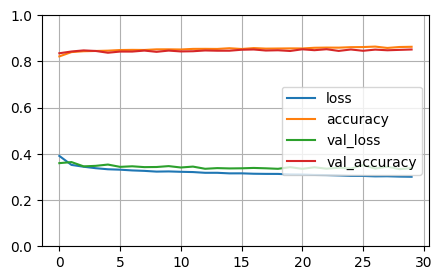

In [ ]:
### MLP(Multi Layer Perceptron) 
# Train Test Split 
from tensorflow import keras
from sklearn import model_selection
from imblearn.over_sampling import RandomOverSampler
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify = y, random_state = 22)
print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')
# Sequential Layers 
mlp_clf = keras.models.Sequential([
                                   keras.layers.Flatten(input_shape=(37,)),
                                   keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
                                   keras.layers.Dense(50, activation="elu", kernel_initializer="he_normal"),
                                   keras.layers.Dense(1, activation="sigmoid")
])
# MLP Callback
checkpoint_cb = keras.callbacks.ModelCheckpoint("MLP", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=30, restore_best_weights=True)
# Model Summary
mlp_clf.summary()
# Model Complie
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
mlp_clf.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
# Model Fitting
mlp_clf.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), callbacks=[checkpoint_cb, early_stopping_cb])
mlp_history = mlp_clf 
# Accuracy measurement
mlp_history = mlp_history.history
# mlp_clf Loss, Accuracy check
pd.DataFrame(mlp_history.history).plot(figsize=(5,3))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
### MLP Confusion Matrix 
results = mlp_clf.evaluate(X_test, y_test, batch_size=128)
print("test loss, test accuracy:", results)

28/28 [==============================] - 0s 2ms/step - loss: 0.3385 - accuracy: 0.8519
test loss, test accuracy: [0.3385078012943268, 0.8519144058227539]


111/111 [==============================] - 0s 2ms/step
Precision Score:  0.9334257975034674
Recall Score:  0.7578828828828829
              precision    recall  f1-score   support

       False       0.80      0.95      0.86      1776
        True       0.93      0.76      0.84      1776

    accuracy                           0.85      3552
   macro avg       0.86      0.85      0.85      3552
weighted avg       0.86      0.85      0.85      3552



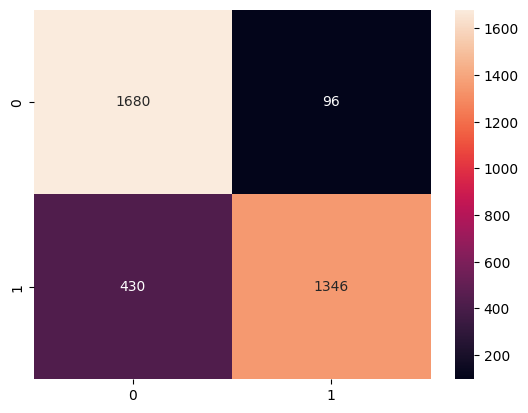

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
y_pred = []
predictions = mlp_clf.predict(X_test)
for i in predictions:
    if i >= 0.5:
        result = 1
        y_pred.append(result)
    else:
        result = 0
        y_pred.append(result)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
print("Precision Score: ", precision_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))
print(classification_report(y_test,y_pred))